In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib
from sklearn.linear_model import LogisticRegression


In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt
path = '/content/seeds_dataset.txt'
features = ['Area','Perimeter','Compactness','Length of kernel',
           'Width of kernel','Asymmetry coefficient', 'Length of kernel groove','target']

df = pd.read_csv(path, delimiter=r'[\t]+', header=None, names=features)

df.head()

--2023-02-28 04:16:11--  https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9300 (9.1K) [application/x-httpd-php]
Saving to: ‘seeds_dataset.txt.4’

seeds_dataset.txt.4 100%[===================>]   9.08K  --.-KB/s    in 0s      

2023-02-28 04:16:11 (94.1 MB/s) - ‘seeds_dataset.txt.4’ saved [9300/9300]



/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print('Class labels:', np.unique(y))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print('Labels counts in y:', np.bincount(y)[1:])
print('Labels counts in y_train:', np.bincount(y_train)[1:])
print('Labels counts in y_test:', np.bincount(y_test)[1:])


Class labels: [1 2 3]
Labels counts in y: [70 70 70]
Labels counts in y_train: [49 49 49]
Labels counts in y_test: [21 21 21]


# Standardizing the features:

In [ ]:


sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# matplotlib

In [ ]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')        



### Classification based on feature 0 and 1 via perceptron  

In [ ]:

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std[:,[0,1]], y_train)


y_pred = ppn.predict(X_test_std[:,[0,1]])
print('Misclassified examples: %d' % (y_test != y_pred).sum())
print('Predicted:', y_pred)
print('True class:', np.array(y_test))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Accuracy: %.3f' % ppn.score(X_test_std[:,[0,1]], y_test))

Misclassified examples: 21
Predicted: [3 2 2 2 2 2 3 3 3 2 3 3 2 3 1 3 3 3 3 3 3 3 3 3 2 2 3 2 3 3 3 2 2 3 2 3 3
 3 1 3 3 3 2 2 3 2 3 2 3 3 3 2 3 3 2 3 3 2 3 2 2 3 2]
True class: [3 2 2 2 2 2 1 3 3 2 1 3 2 3 1 1 3 1 3 1 1 1 1 3 2 2 1 2 3 1 1 2 2 1 2 3 3
 3 2 1 1 3 2 1 3 2 1 2 3 1 3 1 1 3 2 3 3 2 3 2 1 3 2]
Accuracy: 0.667
Accuracy: 0.667


plotting trained data 

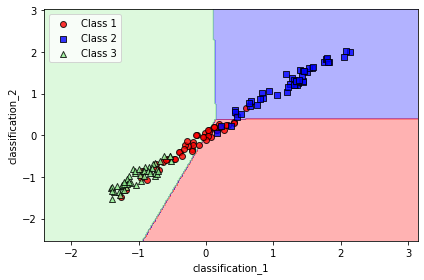

In [ ]:
plot_decision_regions(X_train_std[:,[0,1]], y_train, classifier=ppn)

plt.xlabel('classification_1')
plt.ylabel('classification_2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plotting test data

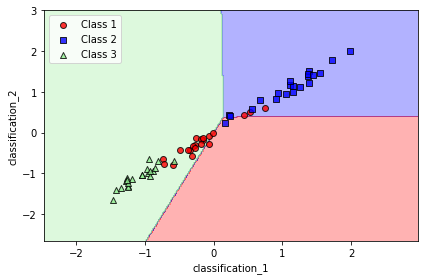

In [ ]:
plot_decision_regions(X_test_std[:,[0,1]], y_test, classifier=ppn)

plt.xlabel('classification_1')
plt.ylabel('classification_2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plotting combined data

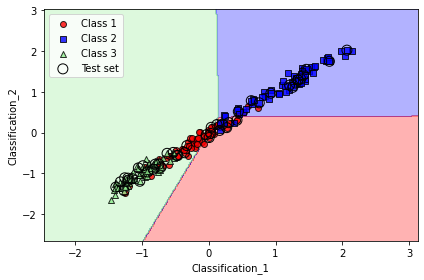

In [ ]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('Classification_1')
plt.ylabel('Classification_2')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()



### Classification based on feature 0 and 1 via LogisticRegression  

In [ ]:

lr = LogisticRegression()
lr.fit(X_train_std[:,[0,1]], y_train)




y_pred = lr.predict(X_test_std[:,[0,1]])
print('Misclassified examples: %d' % (y_test != y_pred).sum())
print('Predicted:', y_pred)
print('True class:', np.array(y_test))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Accuracy: %.3f' % lr.score(X_test_std[:,[0,1]], y_test))

Misclassified examples: 9
Predicted: [3 2 2 2 2 2 1 3 3 2 1 3 2 3 1 1 3 1 3 1 1 3 1 1 2 2 1 2 3 1 1 2 2 1 2 3 3
 3 1 3 1 3 2 2 3 2 3 2 3 1 3 2 1 3 2 3 3 2 3 1 1 3 1]
True class: [3 2 2 2 2 2 1 3 3 2 1 3 2 3 1 1 3 1 3 1 1 1 1 3 2 2 1 2 3 1 1 2 2 1 2 3 3
 3 2 1 1 3 2 1 3 2 1 2 3 1 3 1 1 3 2 3 3 2 3 2 1 3 2]
Accuracy: 0.857
Accuracy: 0.857


plotting trained data

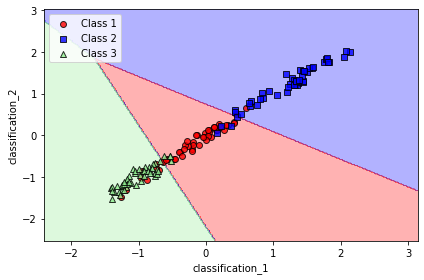

In [ ]:
plot_decision_regions(X_train_std[:,[0,1]], y_train, classifier=lr)

plt.xlabel('classification_1')
plt.ylabel('classification_2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plotting test data

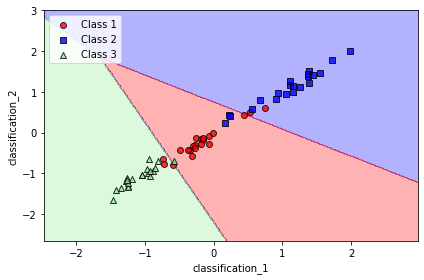

In [ ]:
plot_decision_regions(X_test_std[:,[0,1]], y_test, classifier=lr)

plt.xlabel('classification_1')
plt.ylabel('classification_2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plotting combined data

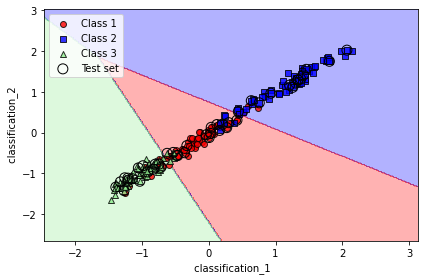

In [ ]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel(' classification_1')
plt.ylabel(' classification_2')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
